# Batch results

I show how to load a collection of `ringdown` results and make a plot.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

import warnings

# suppress annoying seaborn warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# suppress annoying LAL warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")

import ringdown as rd

sns.set(context='notebook', palette='colorblind', style='ticks')

In [3]:
# from importlib import reload
# import ringdown.result
# reload(ringdown.result)

## Analog filter results only

Load all analog filter results in one go. Note that `from_netcdf` will discover how to index the runs based on the directory structure; if you want a different labeling, you can also pass a list of paths and use the `index` argument to provide a list of run labels (which can be tuples or anything).

In [4]:
p = '/mnt/home/hsiegel/ceph/conditioning_data_studies/results/FINAL/GW150914_NOnoise_LIGOWelchPSDAnalogFilter_fundamental_ds*_dur0p05s_flow20p0_A14p5e-21_f1251.00199551019213_ph15p34_tau10p004126712034976184_A25p999999999999999e-21_f2245.42368760857954_ph21p79_tau20p0013647824422501954.nc'
results = rd.ResultCollection.from_netcdf(p, progress=True)

  0%|          | 0/5 [00:00<?, ?it/s]

This `results` object is a collection of `rd.Results`, you can access them by index or by label, e.g.,

In [34]:
results[0]

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data
	> constant_data

Rather than working with the individual `InferenceData` objects, let's get a single DataFrame with parameters sampled for all runs. We will request 500 random samples from each posterior (if we don't do this, we will get a all samples present). We will also pass `latex=True` so that parameters are labeled using LaTex for nicer plotting below.

In [5]:
df = results.get_mode_parameter_dataframe(500, latex=True)

In [6]:
df

,$f / \mathrm{Hz}$,$\gamma / \mathrm{Hz}$,$A$,$\phi$,$\theta$,$\epsilon$,mode,run
0,245.798035,641.034058,1.562042e-20,1.214732,-1.753609,-0.067978,221,16.0
1,250.788116,182.001129,8.466012e-21,1.122968,-1.209184,-0.065434,220,16.0
2,244.566132,570.009583,2.908825e-20,-1.003577,1.484250,0.066478,221,16.0
3,254.477646,188.336884,3.244061e-21,1.354018,0.535001,0.521101,220,16.0
4,246.154419,580.145874,4.059666e-21,0.473279,2.005788,0.706786,221,16.0
...,...,...,...,...,...,...,...,...
2495,251.533875,246.014954,1.567191e-20,1.261610,1.294276,0.092239,220,8.0
2496,249.608124,715.742920,4.629646e-20,0.746386,-1.658677,-0.082537,221,8.0
2497,249.237305,243.617279,6.623678e-21,1.567268,-1.044163,-0.502222,220,8.0
2498,246.402252,703.990051,7.122544e-21,-2.134889,0.585931,-0.506998,221,8.0


Now that we have a DataFrame, we can use any `seaborn` plotting function, e.g., let's plot a corner of all parameters for the 220 mode.

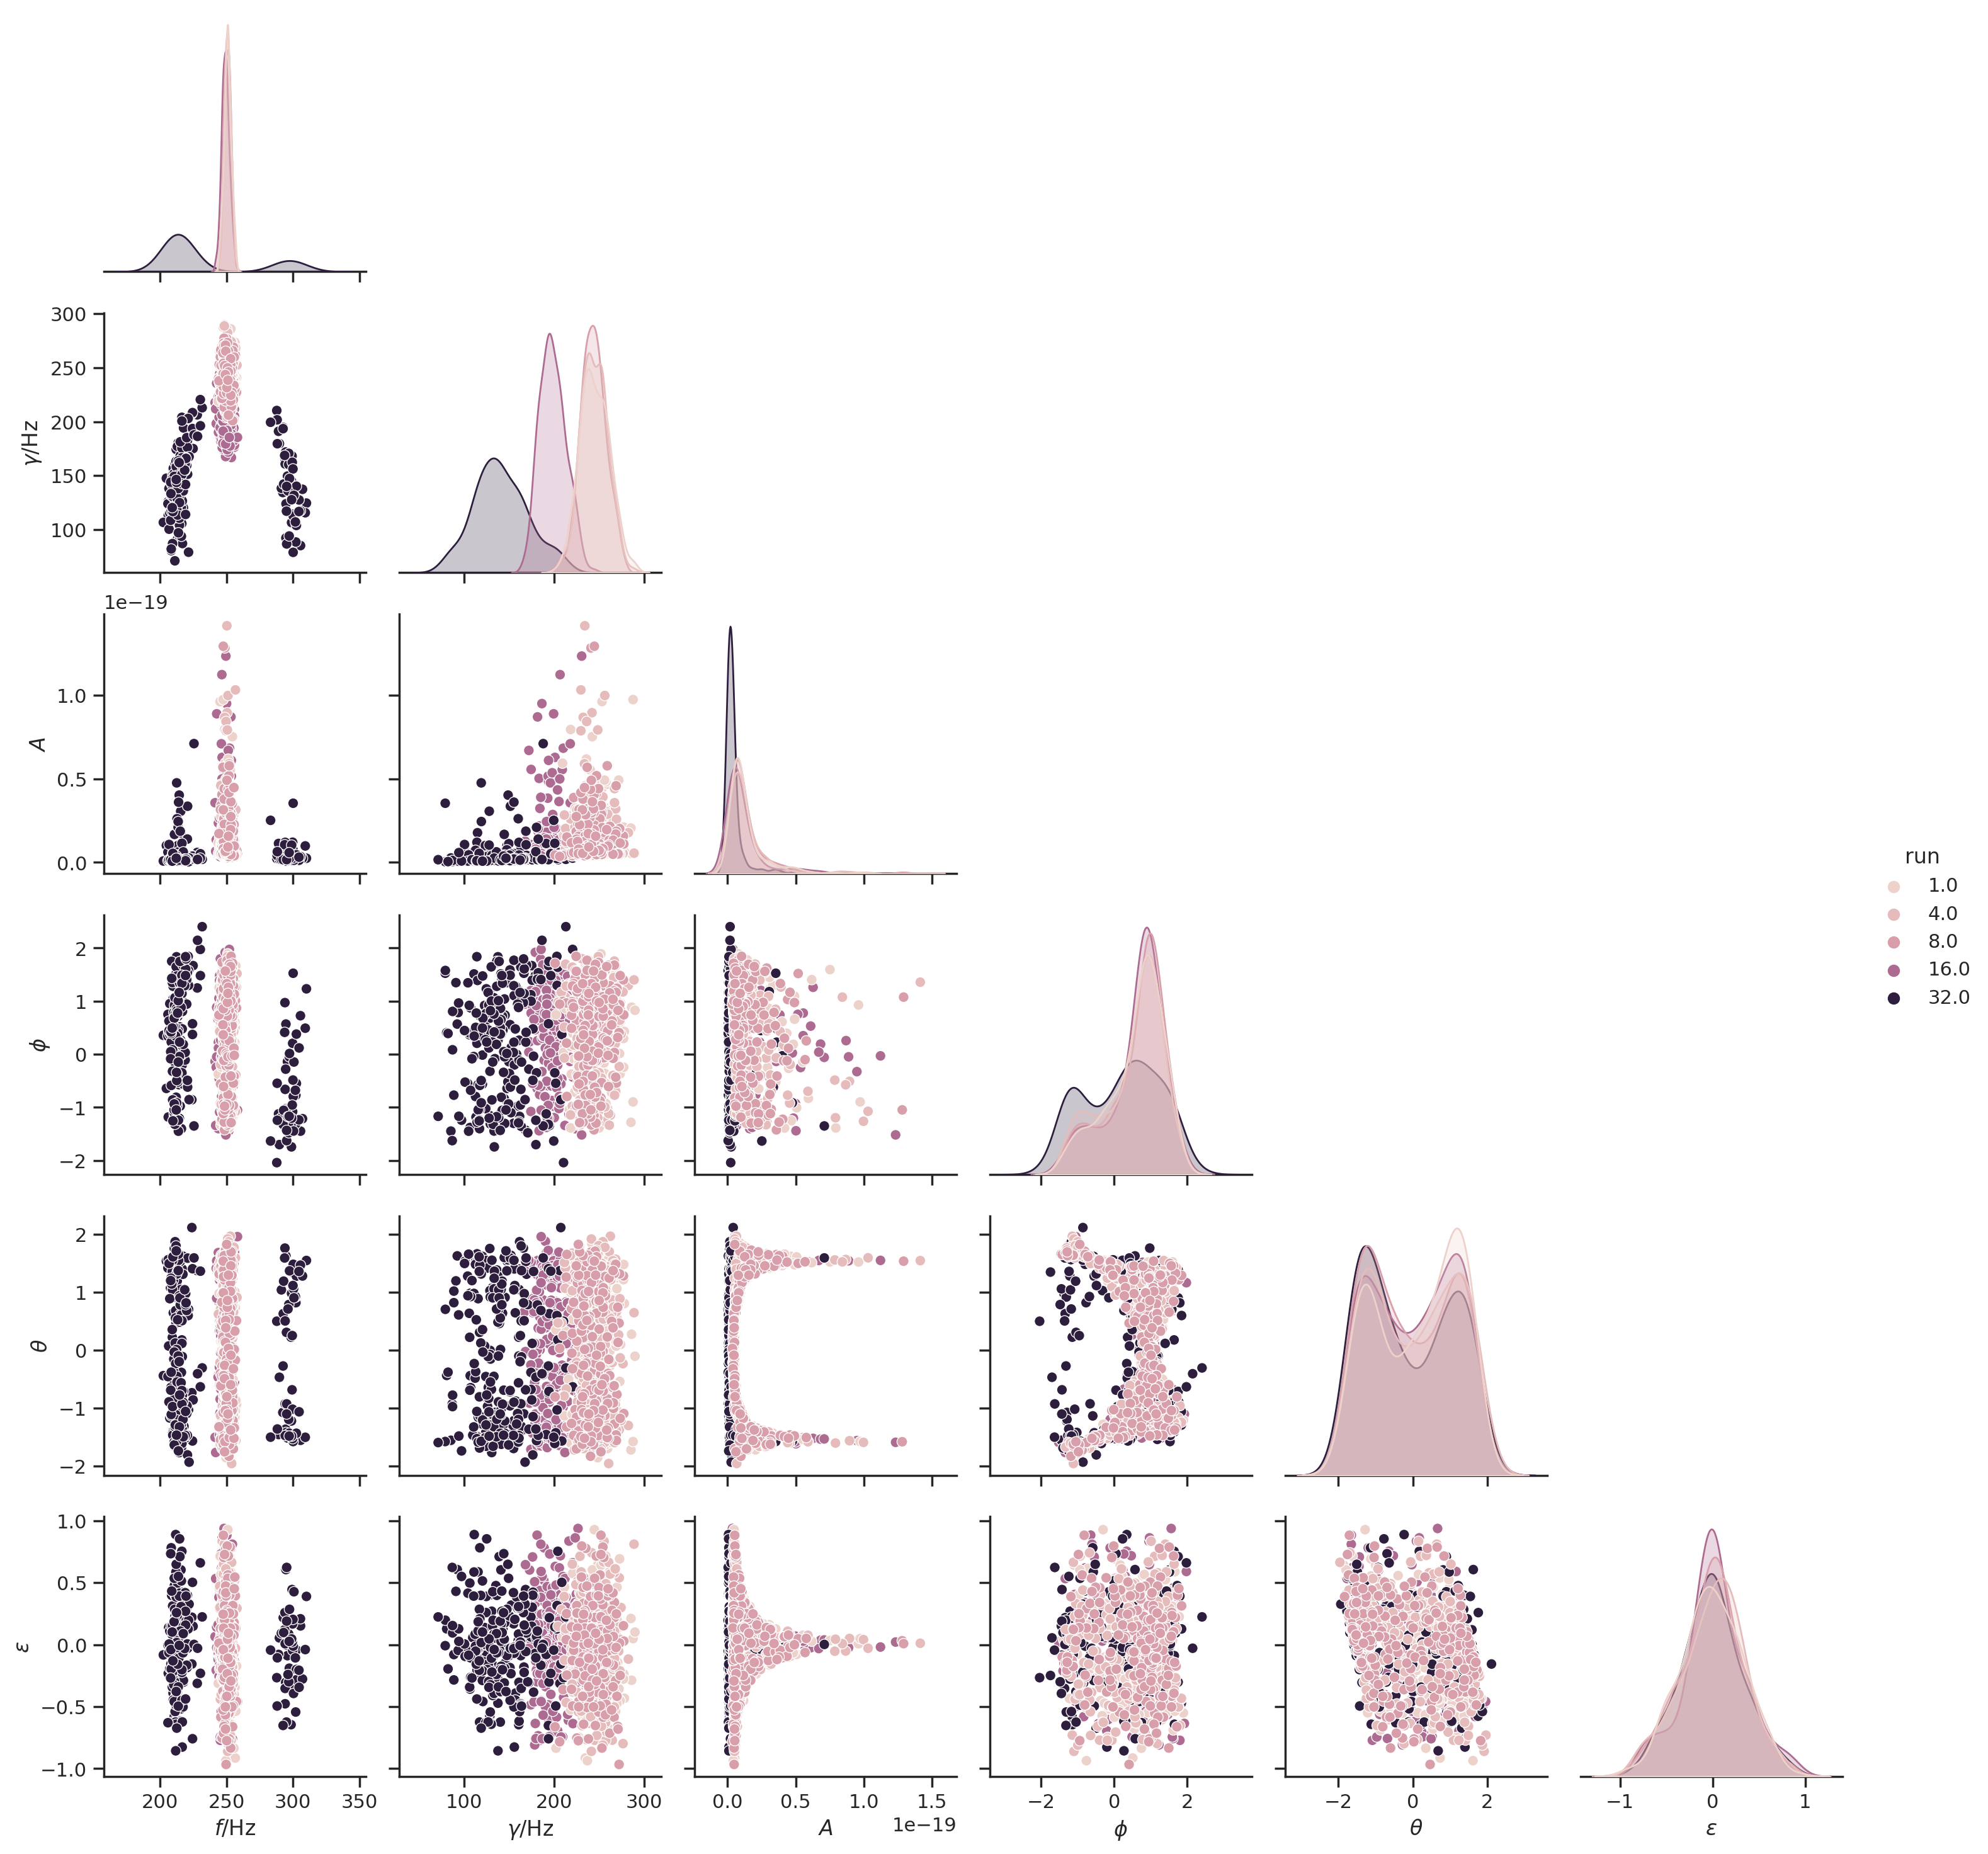

In [7]:
d = df.groupby('mode').get_group('220')
sns.pairplot(d, hue='run', corner=True);

We can also plot parameters of one mode vs the other. We can do this using `df` easily by extracting the parameters of each mode at a time. We can also get a new `DataFrame` in which the parameters of different modes are treated as independent columns, rather than using a `mode` column to index the mode:

In [8]:
df_modes = results.get_parameter_dataframe(500, latex=True)

In [9]:
df_modes

,$M / M_\odot$,$\chi$,$f_{220} / \mathrm{Hz}$,$f_{221} / \mathrm{Hz}$,$\gamma_{220} / \mathrm{Hz}$,$\gamma_{221} / \mathrm{Hz}$,$A_{220}$,$A_{221}$,$\phi_{220}$,$\phi_{221}$,$\theta_{220}$,$\theta_{221}$,$\epsilon_{220}$,$\epsilon_{221}$,run
0,80.455269,0.848089,249.391083,246.872726,180.614090,544.163757,1.460769e-20,7.267850e-21,-0.427016,-0.805238,-1.526149,1.286834,0.193262,0.248706,16.0
1,72.537148,0.751208,248.376160,244.036118,219.752106,663.603943,3.813854e-21,7.318014e-21,0.494642,-0.657965,0.476452,-1.361717,-0.630315,-0.451240,16.0
2,75.536072,0.804171,251.860901,248.470596,202.401489,610.436157,5.535762e-21,1.010357e-20,1.493494,1.077424,1.010630,-1.861830,0.325506,-0.182527,16.0
3,73.790291,0.759515,246.114655,241.968292,214.823883,648.592041,1.116802e-20,8.502879e-21,-0.626611,0.530513,-1.522075,1.829565,0.291298,0.290195,16.0
4,73.893188,0.780332,250.952927,247.120163,211.246017,637.472046,5.961831e-21,3.998356e-21,-0.265326,-1.160958,-1.411473,-0.808192,0.503104,-0.251012,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,68.554344,0.697035,250.485626,245.091492,239.553574,724.353638,3.374092e-20,7.537871e-21,1.219610,-2.090524,-1.444778,-0.729510,-0.035960,0.331255,8.0
2496,67.534317,0.697504,254.367859,248.898987,243.118698,735.125183,1.755572e-20,6.089944e-21,1.311974,-1.048574,1.336160,0.735065,0.070141,0.774170,8.0
2497,66.655243,0.663811,250.871811,244.849045,249.871826,756.172791,7.159326e-21,7.285524e-21,0.976213,-1.596899,0.856328,0.506180,0.043753,0.306037,8.0
2498,63.574291,0.592305,249.851913,242.533936,268.089539,812.757263,6.024018e-21,1.376667e-20,1.691532,1.024029,0.964033,2.116922,0.770055,0.123612,8.0


Since we are using LaTex column names, it is convenient to get a a mapping from simplified parameter keys to latex labels (just because I'm lazy and I don't want to type the full LaTex string)

In [10]:
lmap = rd.qnms.get_parameter_label_map(pars=['a'], modes=df['mode'].unique())
lmap

{'a_221': '$A_{221}$', 'a_220': '$A_{220}$'}

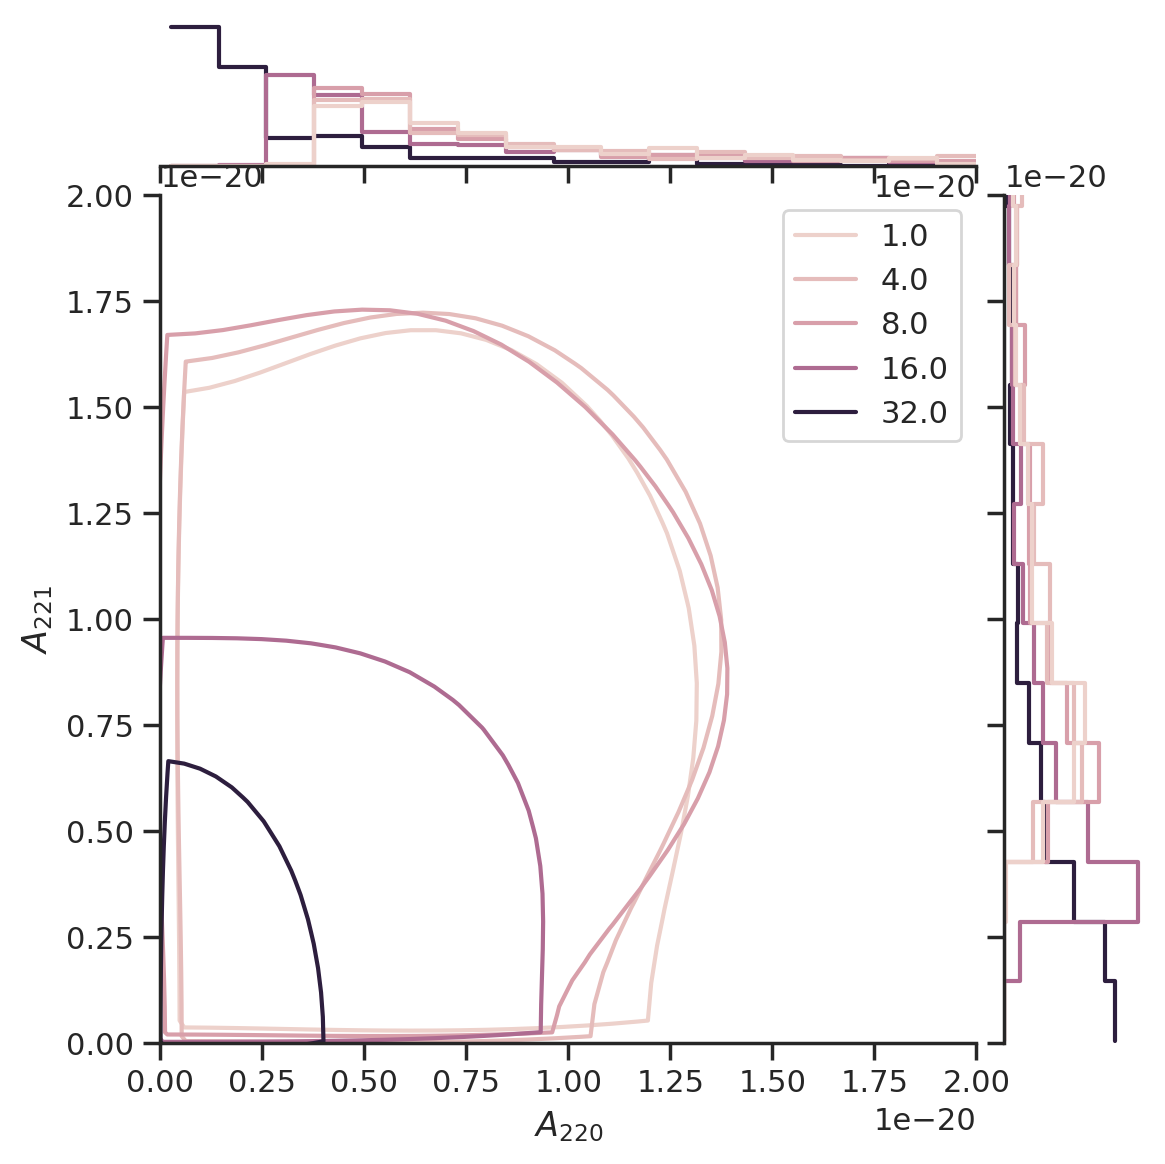

In [26]:
g = sns.JointGrid(data=df_modes, x=lmap['a_220'], y=lmap['a_221'], hue='run', 
                  xlim=(0,0.2E-19), ylim=(0,0.2E-19));
g.plot_joint(rd.utils.kde_contour.kdeplot_2d_clevels, levels=[0.5,], x_min=0, y_min=0)
g.plot_marginals(sns.histplot, common_norm=False, common_bins=True, element='step', fill=False);

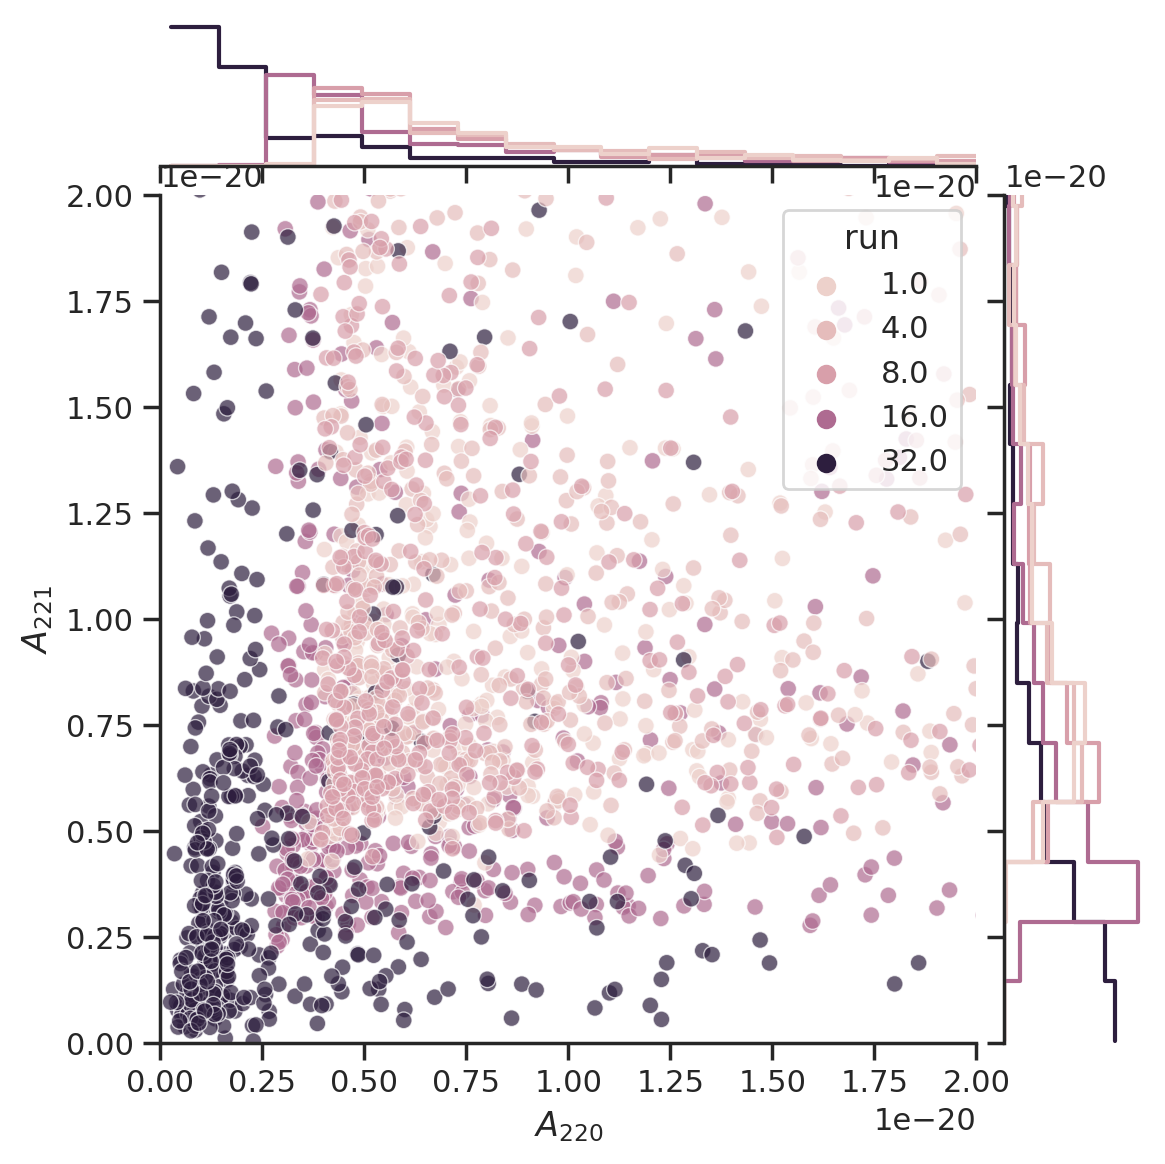

In [33]:
g = sns.JointGrid(data=df_modes, x=lmap['a_220'], y=lmap['a_221'], hue='run', 
                  xlim=(0,0.2E-19), ylim=(0,0.2E-19));
g.plot_joint(sns.scatterplot, alpha=0.7)
g.plot_marginals(sns.histplot, common_norm=False, common_bins=True, element='step', fill=False);

## Both analog and filter results

Batch loading with `ResultsCollection` is not limited to a single index. We can load both analog and digital filter results simultaneously.

In [35]:
p = '/mnt/home/hsiegel/ceph/conditioning_data_studies/results/FINAL/GW150914_NOnoise_LIGOWelchPSD*Filter_fundamental_ds*_dur0p05s_flow20p0_A14p5e-21_f1251.00199551019213_ph15p34_tau10p004126712034976184_A25p999999999999999e-21_f2245.42368760857954_ph21p79_tau20p0013647824422501954.nc'
results2 = rd.ResultCollection.from_netcdf(p, progress=True)

  0%|          | 0/10 [00:00<?, ?it/s]

In [41]:
df2 = results2.get_mode_parameter_dataframe(500)

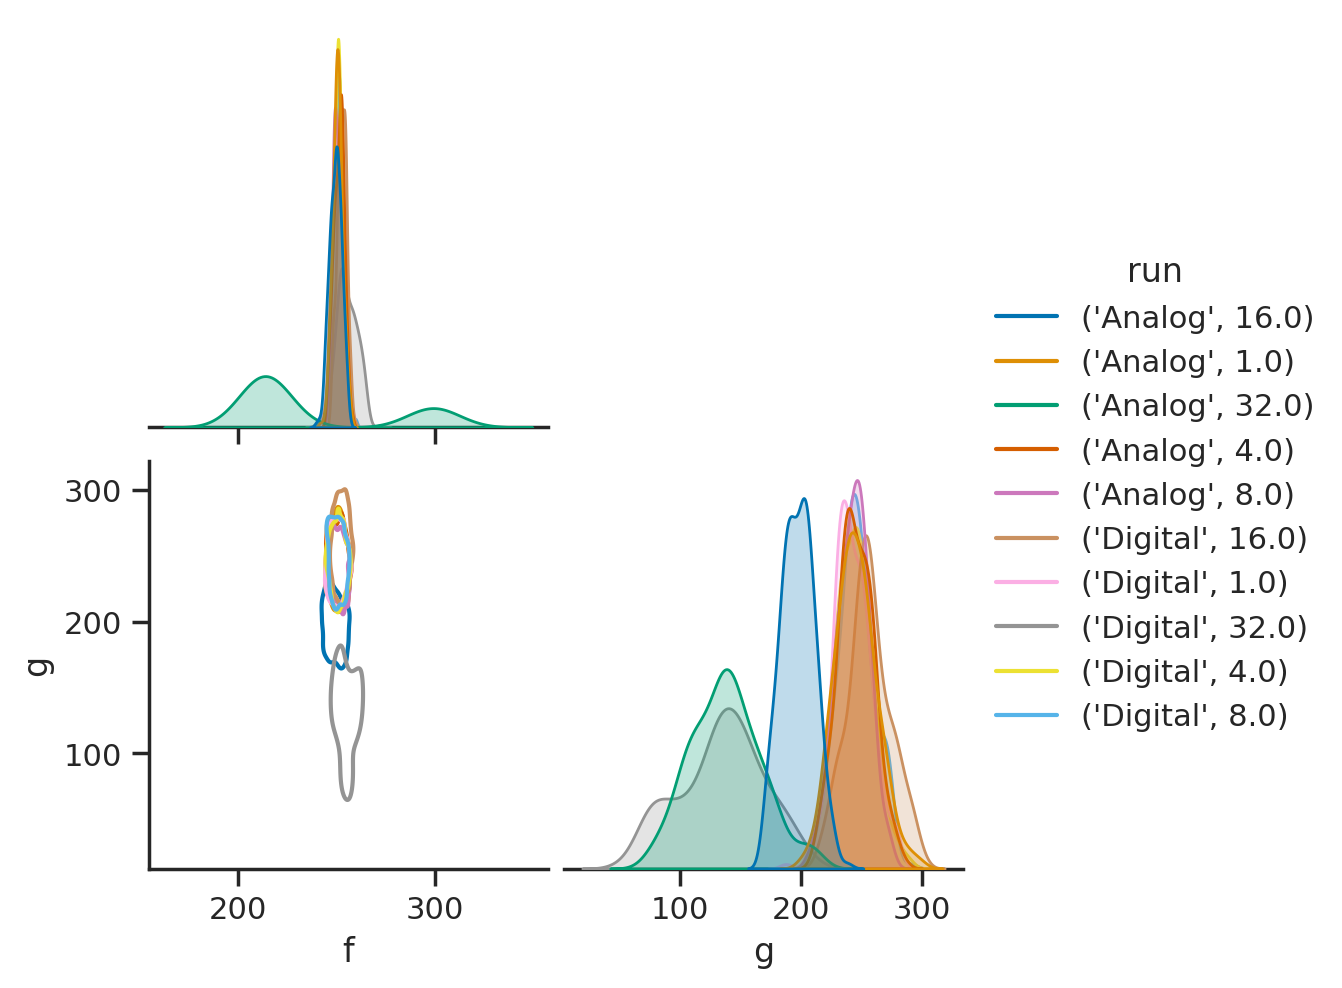

In [46]:
d = df2.groupby('mode').get_group('220')
sns.pairplot(d, hue='run', vars=['f', 'g'], corner=True,
             kind='kde', plot_kws=dict(levels=[0.1]));